# A Clinical Prediction Model for Hospital Mortality
Grace Ogundaini

## 
The aim of this prediction model is to provide patient risk stratification for identifying patients who are likely to 
die during their hospital stay. Data were extracted from the Medical Information Mart for Intensive Care (MIMICIII) database. 
Clinical prediction models use variables selected because they are thought to be associated (either negatively or positively) 
with the outcome of interest. The outcome variable is death during the hospital stay. 

Each instance in the mimic3data.csv attached is one admission Testing a theory I have, that one can predict hospital Mortality 
just by the number of interactions betweeen patient and hospital per day. 
I've used the following features for the Mortality prediction as a Classification problem: 
Age, Gender, Admission Type, Admission Source Daily average number of: Labs, Micro labs, IV meds, Non-IV meds, Imaging Reports, Notes, Orders, Caregivers, Careunits, etc.

### 
**Algorithm Predictors**:number of interactions between patient and hospital per day

**Analytic Methodology and Validation**:Python, Machine learning, Neural networks, Keras, Libraries; pandas, Matplotlib

**Algorithm Interpretation**: Health research clinical model to be used by medical practitioners and researchers.

**Algorithm Implementation**:The model involves the use of complex methods that take time to train and run. It  would have to operate externally through FHIR technologies. 

In [ ]:
import pandas as pd
import numpy as np
import random as rnd
import pprint
from itertools import cycle, islice
import numpy as np

In [2]:
from scipy.stats import multivariate_normal

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict

In [5]:
from sklearn.decomposition import PCA

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
data = pd.read_csv(r'C:\Users\ODUNAYO\Documents\mimic3.csv')
print("With id", data.shape)


With id (58976, 28)


In [25]:
data_full = data.drop('hadm_id', 1)
print("No id",data_full.shape)

No id (58976, 27)


In [26]:
print(data_full.shape)
data_full.info()
data_full.describe()

(58976, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            58976 non-null  object 
 1   age               58976 non-null  int64  
 2   LOSdays           58976 non-null  float64
 3   admit_type        58976 non-null  object 
 4   admit_location    58976 non-null  object 
 5   AdmitDiagnosis    58951 non-null  object 
 6   insurance         58976 non-null  object 
 7   religion          58518 non-null  object 
 8   marital_status    48848 non-null  object 
 9   ethnicity         58976 non-null  object 
 10  NumCallouts       58976 non-null  float64
 11  NumDiagnosis      58976 non-null  float64
 12  NumProcs          58976 non-null  float64
 13  AdmitProcedure    58976 non-null  object 
 14  NumCPTevents      58976 non-null  float64
 15  NumInput          58976 non-null  float64
 16  NumLabs           58976 non-

,age,LOSdays,NumCallouts,NumDiagnosis,NumProcs,NumCPTevents,NumInput,NumLabs,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
count,58976.000000,58976.000000,58976.000000,58976.00000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000,58976.000000
mean,53.005884,10.114955,0.099374,2.67596,0.785599,1.074118,30.379017,46.421124,1.219913,6.464789,7.111594,9.593702,0.691903,1.093313,528.505172,0.099261,636.115579,2.360248
std,26.028120,12.456231,0.163437,8.26559,3.558090,2.027148,62.430163,76.061561,4.236693,106.709903,7.551822,12.601338,2.117615,3.169441,640.250063,0.299014,783.938087,1.130337
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,43.000000,3.710000,0.000000,0.82000,0.210000,0.000000,4.850000,26.980000,0.160000,0.140000,1.750000,4.330000,0.000000,0.380000,207.410000,0.000000,267.407500,1.000000
50%,59.000000,6.460000,0.000000,1.41000,0.420000,0.970000,13.990000,38.520000,0.510000,0.330000,5.310000,8.370000,0.000000,0.650000,417.875000,0.000000,497.335000,2.000000
75%,73.000000,11.790000,0.160000,2.40000,0.710000,1.560000,34.360000,50.860000,1.350000,0.770000,10.490000,12.270000,0.880000,1.060000,700.302500,0.000000,811.382500,3.000000
max,89.000000,294.630000,4.760000,450.00000,275.000000,225.000000,6825.000000,5175.000000,375.000000,7500.000000,375.000000,750.000000,100.000000,125.000000,49325.000000,1.000000,68600.000000,4.000000


In [27]:
data_full.head(10)

,gender,age,LOSdays,admit_type,admit_location,AdmitDiagnosis,insurance,religion,marital_status,ethnicity,...,NumMicroLabs,NumNotes,NumOutput,NumRx,NumProcEvents,NumTransfers,NumChartEvents,ExpiredHospital,TotalNumInteract,LOSgroupNum
0,F,35,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,DIABETIC KETOACIDOSIS,Private,PROTESTANT QUAKER,DIVORCED,WHITE,...,0.65,0.05,5.19,14.91,1.13,0.65,398.70,0,493.89,2
1,M,59,4.04,EMERGENCY,EMERGENCY ROOM ADMIT,UPPER GI BLEED,Private,NOT SPECIFIED,SINGLE,WHITE,...,1.24,1.59,5.45,7.18,0.99,1.24,373.02,0,465.71,2
2,F,48,12.04,EMERGENCY,EMERGENCY ROOM ADMIT,COPD FLARE,Private,NOT SPECIFIED,SINGLE,BLACK/AFRICAN AMERICAN,...,0.33,0.15,4.15,6.23,0.00,0.33,286.21,0,344.00,4
3,F,73,7.29,EMERGENCY,EMERGENCY ROOM ADMIT,BOWEL OBSTRUCTION,Private,JEWISH,MARRIED,WHITE,...,0.69,0.17,9.05,11.52,0.00,0.96,526.06,0,603.05,2
4,M,60,4.88,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Private,CATHOLIC,MARRIED,WHITE,...,0.61,0.34,16.19,25.00,2.87,2.05,554.92,0,679.84,2
5,F,54,4.38,ELECTIVE,PHYS REFERRAL/NORMAL DELI,RENAL MASS LEFT/SDA,Private,EPISCOPALIAN,MARRIED,WHITE,...,0.00,0.11,7.99,9.13,1.14,0.91,448.63,0,509.00,2
6,M,21,14.38,EMERGENCY,CLINIC REFERRAL/PREMATURE,MOTOR VEHICLE ACCIDENT WITH UNSPECIFIED INJURIES,Medicaid,NOT SPECIFIED,SINGLE,HISPANIC OR LATINO,...,1.88,0.21,18.01,9.94,4.10,0.21,1337.13,0,1482.53,4
7,M,67,10.08,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,CORONARY ARTERY DISEASE,Medicare,CATHOLIC,MARRIED,WHITE,...,0.30,0.15,15.48,14.48,2.28,0.60,524.11,0,618.11,3
8,F,49,0.63,ELECTIVE,PHYS REFERRAL/NORMAL DELI,RIGHT SHOULDER ADHESIVE CAPSULITIS/SDA,Medicaid,CATHOLIC,SINGLE,WHITE,...,0.00,0.00,0.00,0.00,0.00,4.76,0.00,0,25.39,1
9,M,55,6.17,EMERGENCY,CLINIC REFERRAL/PREMATURE,PNEUMONIA,Medicare,PROTESTANT QUAKER,SINGLE,WHITE,...,0.81,0.21,16.53,10.05,1.13,0.49,1221.39,0,1315.92,2


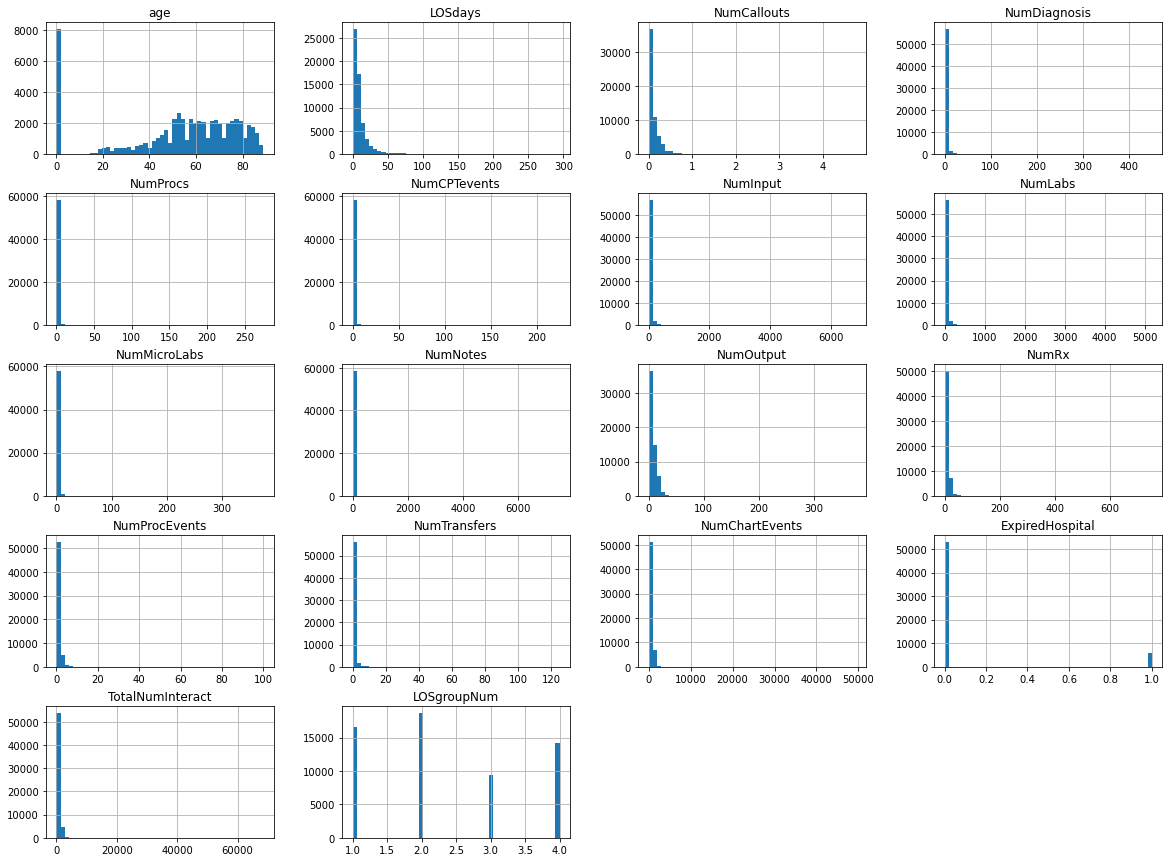

In [28]:
data_full.hist(bins=50, figsize=(20,15))
plt.show()

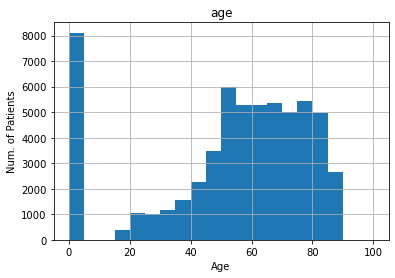

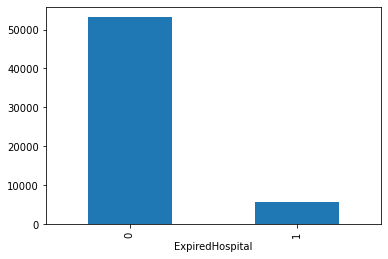

In [29]:
age_histogram = data_full.hist(column='age', bins=20, range=[0, 100])
for ax in age_histogram.flatten():
    ax.set_xlabel("Age")
    ax.set_ylabel("Num. of Patients")
plt.show()
data_full.groupby('ExpiredHospital').size().plot.bar()
plt.show()

In [30]:
# Label = ExpiredHospital
y = data_full['ExpiredHospital']
X = data_full.drop('ExpiredHospital', 1)

X = X.drop('LOSdays', 1)
X = X.drop('LOSgroupNum', 1)
X = X.drop('AdmitDiagnosis', 1)
X = X.drop('AdmitProcedure', 1)
X = X.drop('marital_status', 1)
X = X.drop('ethnicity', 1)
X = X.drop('religion', 1)
X = X.drop('insurance', 1)

print("y - Labels", y.shape)
print("X - No Label No id ", X.shape)
print(X.columns)

y - Labels (58976,)
X - No Label No id  (58976, 18)
Index(['gender', 'age', 'admit_type', 'admit_location', 'NumCallouts',
       'NumDiagnosis', 'NumProcs', 'NumCPTevents', 'NumInput', 'NumLabs',
       'NumMicroLabs', 'NumNotes', 'NumOutput', 'NumRx', 'NumProcEvents',
       'NumTransfers', 'NumChartEvents', 'TotalNumInteract'],
      dtype='object')


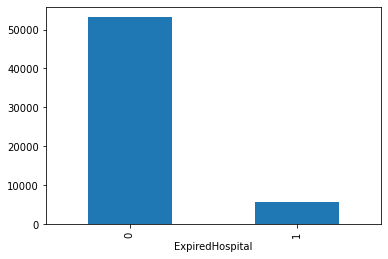

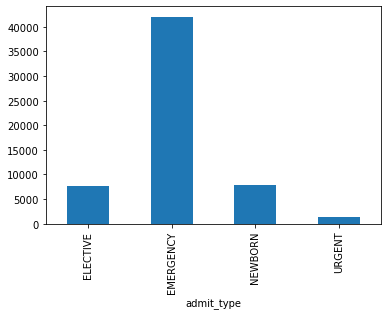

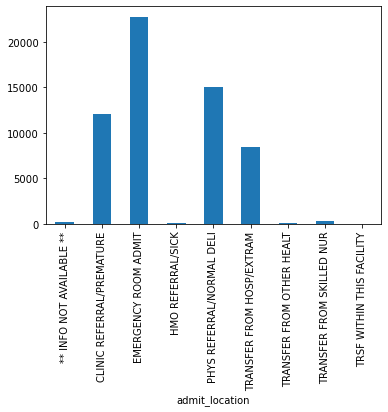

In [31]:
data_full.groupby('ExpiredHospital').size().plot.bar()
plt.show()
data_full.groupby('admit_type').size().plot.bar()
plt.show()
data_full.groupby('admit_location').size().plot.bar()
plt.show()

In [32]:
# converting categorical features to numerical

print(X.shape)
categorical_columns = [
                    'gender',                     
                    'admit_type',
                    'admit_location'
                      ]
for col in categorical_columns:
    #if the original column is present replace it with a one-hot
    if col in X.columns:
        one_hot_encoded = pd.get_dummies(X[col])
        X = X.drop(col, axis=1)
        X = X.join(one_hot_encoded, lsuffix='_left', rsuffix='_right')
        
print(X.shape)

(58976, 18)
(58976, 30)


In [34]:
print(X.columns)
#print(X['VENTRICULOSTOMY          '])

Index(['age', 'NumCallouts', 'NumDiagnosis', 'NumProcs', 'NumCPTevents',
       'NumInput', 'NumLabs', 'NumMicroLabs', 'NumNotes', 'NumOutput', 'NumRx',
       'NumProcEvents', 'NumTransfers', 'NumChartEvents', 'TotalNumInteract',
       'F', 'M', 'ELECTIVE', 'EMERGENCY', 'NEWBORN', 'URGENT',
       '** INFO NOT AVAILABLE **', 'CLINIC REFERRAL/PREMATURE',
       'EMERGENCY ROOM ADMIT', 'HMO REFERRAL/SICK',
       'PHYS REFERRAL/NORMAL DELI', 'TRANSFER FROM HOSP/EXTRAM',
       'TRANSFER FROM OTHER HEALT', 'TRANSFER FROM SKILLED NUR',
       'TRSF WITHIN THIS FACILITY'],
      dtype='object')


In [35]:
print(data_full.shape)
print(X.shape)

XnotNorm = X.copy()
print('XnotNorm ', XnotNorm.shape)

#yFI = data_full.expired_icu
ynotNorm = y.copy()
print('ynotNorm ', ynotNorm.shape)

(58976, 27)
(58976, 30)
XnotNorm  (58976, 30)
ynotNorm  (58976,)


In [36]:
# Normalize X

x = XnotNorm.values #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
XNorm = pd.DataFrame(x_scaled, columns=XnotNorm.columns)
print(XNorm)


            age  NumCallouts  NumDiagnosis  NumProcs  NumCPTevents  NumInput  \
0     -0.691792     0.370949     -0.010400 -0.220794      0.111429 -0.084239   
1      0.230296     0.921627     -0.053954  0.057447      0.446879 -0.268607   
2     -0.192328    -0.608032     -0.233011 -0.173015     -0.120425 -0.303045   
3      0.768180     1.900608     -0.240270 -0.144910     -0.189488 -0.161446   
4      0.268716    -0.608032      0.122683  0.009668      0.580072 -0.158403   
...         ...          ...           ...       ...           ...       ...   
58971  0.268716    -0.608032     -0.278985 -0.071837     -0.066161  4.814076   
58972  0.191876    -0.608032     -0.212444 -0.105563     -0.224020  1.037984   
58973 -1.152835    -0.608032     -0.251159 -0.069026     -0.500273 -0.283824   
58974  0.614499    -0.608032      0.005328 -0.077458     -0.446009 -0.072546   
58975  1.344485    -0.608032     -0.038226 -0.170205      0.096630 -0.378811   

        NumLabs  NumMicroLabs  NumNotes

In [37]:
# SPLIT into Train & Test

X_train, X_test, y_train, y_test = train_test_split(XNorm, y, test_size=0.1, random_state=42)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)

X_train:  (53078, 30)
X_test:  (5898, 30)
y_train:  (53078,)
y_test:  (5898,)


In [39]:
# Test Models and evaluation metric
seed = 7
scoring = 'accuracy' 

# Spot Check Algorithms
Mymodels = []
#Mymodels.append(('LogReg', LogisticRegression()))
Mymodels.append(('RandomForest', RandomForestClassifier()))
#Mymodels.append(('SGDclassifier', SGDClassifier()))
#Mymodels.append(('KNearestNeighbors', KNeighborsClassifier()))
#Mymodels.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
#Mymodels.append(('GaussianNB', GaussianNB()))
#Mymodels.append(('SVM', SVC()))


In [44]:
# Evaluate each model in turn
results = []
names = []
for name, model in Mymodels:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RandomForest: 0.939071 (0.002565)
